In [1]:
!pip install opencv-python

In [2]:
import cv2

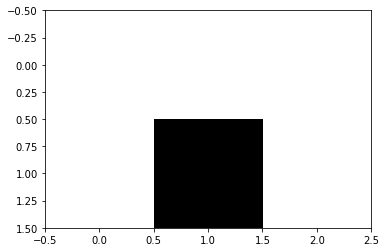

In [4]:
import matplotlib.pyplot as plt
import numpy as np

img = np.asarray([[255,255,255],[255,0,255]])
plt.imshow(img, cmap = 'gray');

In [5]:
img[0][0]

255

In [6]:
img2 = img.copy()

In [7]:
img2[img==0]= 255
img2[img==255]= 0

In [8]:
img2

array([[  0,   0,   0],
       [  0, 255,   0]])

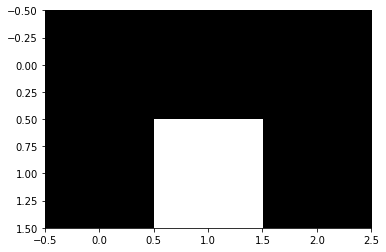

In [9]:
plt.imshow(img2, cmap = 'gray');

In [10]:
!pip install requests

In [11]:
# Fazendo o download da imagem Lenna
# Para saber mais: https://en.wikipedia.org/wiki/Lenna
import requests
lenna_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"

# Puxando dados
img_data = requests.get(url=lenna_url).content
with open("lenna.png", 'wb') as handler:
    handler.write(img_data)

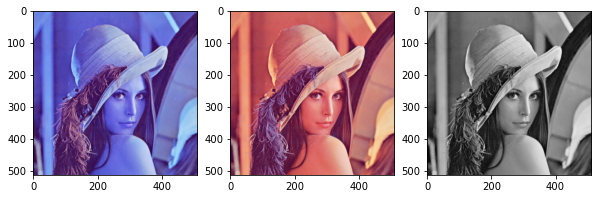

In [12]:
# Lendo a imagem salva de `lenna.png`, utilizando o cv2
lenna_img = cv2.imread("lenna.png")

# Não se preocupe com o código abaixo, por enquanto.
# Nele transformamos a figura de BGR para RGB
lenna_img_rgb = cv2.cvtColor(lenna_img, cv2.COLOR_BGR2RGB)

# Transformando a figura BGR para escala de cinza!
lenna_gray_img = cv2.cvtColor(lenna_img, cv2.COLOR_BGR2GRAY)

# Plotando a figura colorida, e a sua versão em escala de cinza
f, ax = plt.subplots(1, 3, figsize = (10, 5))
ax[0].imshow(lenna_img)
ax[1].imshow(lenna_img_rgb)
ax[2].imshow(lenna_gray_img, cmap="gray");

### Escala de cinza

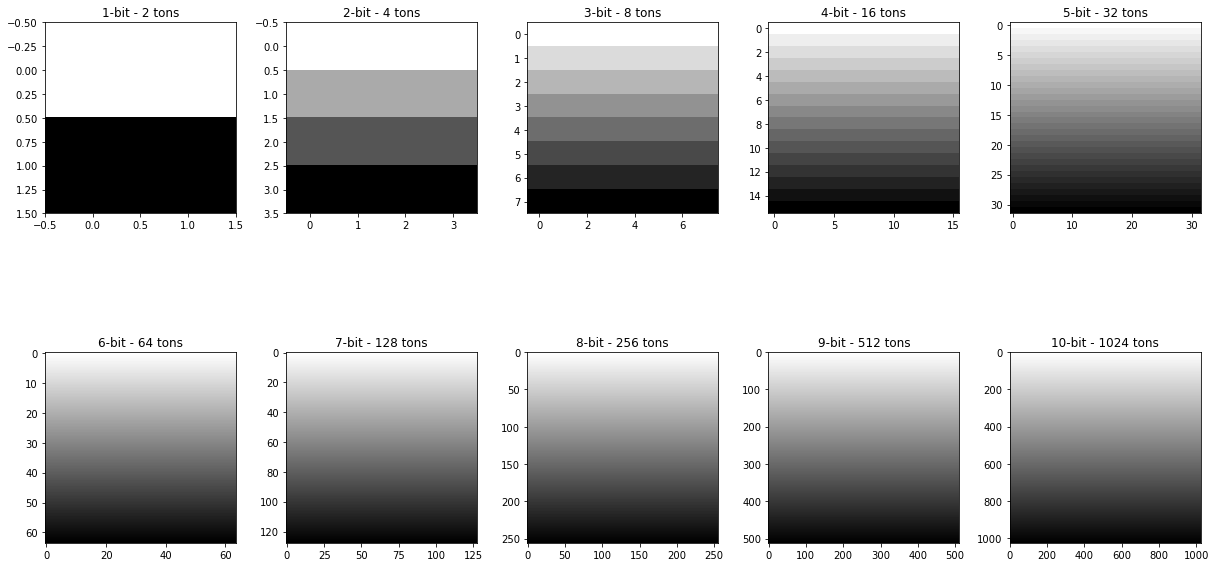

In [13]:
gradients = {} # dicionário para armazenar os nosso gradientes de cinza
for bit in range(1, 11): # Loop de 1 até 10 bits.
        # Criando uma matriz de n bits de profundidade
      # Aqui invertemos o array para ficar uma escala de branco para preto e não preto para branco
    gradient = np.linspace(0, 1, 2**bit)[::-1]
        # Truque para o plot e todas as figuras ficarem com a mesma dimensão
    gradient = np.vstack([gradient for _ in range(2**bit)])
        # Fazemos a transposta da matriz para obter um gradiente vertical e não horizontal!    
    gradients[f"{bit}"] = gradient.T

# Vamos utilizar o matplotlib para mostrar os gradientes de cinza de acordo com o bit-depth!
f, ax = plt.subplots(2, 5, figsize=(17,10))

row = 0
col = 0
for i, (key, gradient) in enumerate(gradients.items()):
        # Pequeno truque para colocar a figura no subplot correto
    if i == 5:
        row = 1
        col = 0

    ax[row][col].imshow(gradient, cmap='gray')
        # Ajustando o título do subplot
    ax[row][col].title.set_text(f'{key}-bit - {2**(int(key))} tons')
        # Removendo os ticks e texto do eixo x e y
    #ax[row][col].get_xaxis().set_visible(False)
    #ax[row][col].get_yaxis().set_visible(False)
    col +=1
f.tight_layout()

In [8]:
gradients

{'1': array([[1., 1.],
        [0., 0.]]),
 '2': array([[1.        , 1.        , 1.        , 1.        ],
        [0.66666667, 0.66666667, 0.66666667, 0.66666667],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.        , 0.        , 0.        , 0.        ]]),
 '3': array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        ],
        [0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286],
        [0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
         0.71428571, 0.71428571, 0.71428571],
        [0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
         0.57142857, 0.57142857, 0.57142857],
        [0.42857143, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
         0.42857143, 0.42857143, 0.42857143],
        [0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
         0.28571429, 0.28571429, 0.28571429],
        [0.14285714, 0.

In [4]:
for i, (key, gradient) in enumerate(gradients.items()):
    print(i)
    print(key)
    print(gradient)

0
1
[[1. 1.]
 [0. 0.]]
1
2
[[1.         1.         1.         1.        ]
 [0.66666667 0.66666667 0.66666667 0.66666667]
 [0.33333333 0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.        ]]
2
3
[[1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  0.85714286 0.85714286]
 [0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
  0.71428571 0.71428571]
 [0.57142857 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857
  0.57142857 0.57142857]
 [0.42857143 0.42857143 0.42857143 0.42857143 0.42857143 0.42857143
  0.42857143 0.42857143]
 [0.28571429 0.28571429 0.28571429 0.28571429 0.28571429 0.28571429
  0.28571429 0.28571429]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714 0.14285714]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
3
4
[[1.         1.         1.         1.         1

In [48]:
gradiente = np.linspace(0,1,2**2)[::-1] # (start, end, n_elements = 50)
gradiente = np.vstack(gradiente)
gradiente # a definição de vetor em lagelin é dados na vertical
# 0 é preto e 1 é branco

array([[1.        ],
       [0.66666667],
       [0.33333333],
       [0.        ]])